<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependenices" data-toc-modified-id="Dependenices-1">Dependenices</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#GO-pathways" data-toc-modified-id="GO-pathways-5">GO pathways</a></span></li><li><span><a href="#Load-GO-table" data-toc-modified-id="Load-GO-table-6">Load GO table</a></span><ul class="toc-item"><li><span><a href="#Find-exclusive-pathways" data-toc-modified-id="Find-exclusive-pathways-6.1">Find exclusive pathways</a></span></li><li><span><a href="#GoSemSim" data-toc-modified-id="GoSemSim-6.2">GoSemSim</a></span></li></ul></li><li><span><a href="#Top-Genes" data-toc-modified-id="Top-Genes-7">Top Genes</a></span></li><li><span><a href="#Create-a-gene-table" data-toc-modified-id="Create-a-gene-table-8">Create a gene table</a></span></li><li><span><a href="#Load-gene-table" data-toc-modified-id="Load-gene-table-9">Load gene table</a></span></li><li><span><a href="#Volcano-plots" data-toc-modified-id="Volcano-plots-10">Volcano plots</a></span></li><li><span><a href="#Get-gene-descriptions---TableS9" data-toc-modified-id="Get-gene-descriptions---TableS9-11">Get gene descriptions - TableS9</a></span></li></ul></div>

# Dependenices

In [1]:
library(ggrepel)
library(DESeq2)
library(clusterProfiler)
library(org.Hs.eg.db)

Loading required package: ggplot2

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attachin

# Functions

In [2]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/plotting_functions.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")


Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor p

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [4]:
load(file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

Run deseq2 on h4h

with only protein coding genes

# GO pathways

In [5]:
pathwaytable <- data.frame(matrix(ncol = 12, nrow = 0))

In [6]:
colnames(pathwaytable) <- c("ID","Description","setSize","enrichmentScore","NES","pvalue","p.adjust",
                            "qvalues","rank","leading_edge","core_enrichment", "contrast")

In [7]:
pathwaytable

ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,contrast
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>


In [8]:
for(c in c("C1", "C2", "C3", "C4")){
    
    message(c)
    flush.console()
    
    load(file = paste0(datapath, "DEG/shrunken_results_",c,"_0.RData"))
    
    mycontrast <- paste0(c, " vs others")
    
    mygenelist <- shrunken_res$log2FoldChange
    names(mygenelist) <- rownames(shrunken_res)
    #order genelist
    mygenelist <- mygenelist[order(mygenelist, decreasing = T)]

    go <- gseGO(geneList     = mygenelist,
              OrgDb        = org.Hs.eg.db,
              ont          = "BP",
              keyType = "SYMBOL",
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              eps = 0,
              verbose = FALSE)
    
    godf <- as.data.frame(go)
    godf$contrast <- mycontrast
    
    pathwaytable <- rbind(pathwaytable, godf)
    
}

C1

Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
C2

C3

Warning message in fgseaMultilevel(...):
“There were 20 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
C4

Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”


In [9]:
GOpathwaytable <- pathwaytable

In [10]:
save(GOpathwaytable, file = paste0(datapath, "DEG/DESeq2_GOpathwaytable_shrunken.RData"))

# Load GO table

In [11]:
load(file = paste0(datapath, "DEG/DESeq2_GOpathwaytable_shrunken.RData"))

In [12]:
summary(GOpathwaytable$NES)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.71969 -1.76959 -1.33832 -0.03786  1.73136  3.15042 

In [70]:
sigpathways <- GOpathwaytable[abs(GOpathwaytable$NES) >= 2 & GOpathwaytable$p.adjust < 0.1,]

In [71]:
table(sigpathways$contrast)


C1 vs others C2 vs others C3 vs others C4 vs others 
         202          204          131          200 

In [15]:
xlsx::write.xlsx(sigpathways, file = "~/OneDrive - UHN/Documents/Manuscripts/IPD/v9/TableS8.xlsx",
               row.names = F)

## Find exclusive pathways

In [72]:
exclusive_pathways <- sigpathways[0,]

In [73]:
dim(GOpathwaytable)
dim(sigpathways)

[1] 2168   12

[1] 737  12

In [74]:
pathwayfreq <- as.data.frame(table(sigpathways$Description))

In [75]:
for(p in pathwayfreq$Var1){
    tmp <- sigpathways[ sigpathways$Description == p,]
    if( nrow(tmp) == 1){
        exclusive_pathways <- rbind(exclusive_pathways, tmp)
        
    } else{
        if( sum(tmp$NES > 0) == 1){
           exclusive_pathways <- rbind(exclusive_pathways, tmp) 
        }
    }
}

In [76]:
exclusive_pathways_C1 <- exclusive_pathways[ exclusive_pathways$contrast == "C1 vs others" &
                                            exclusive_pathways$NES > 0,]

exclusive_pathways_C2 <- exclusive_pathways[ exclusive_pathways$contrast == "C2 vs others" &
                                            exclusive_pathways$NES > 0,]

exclusive_pathways_C3 <- exclusive_pathways[ exclusive_pathways$contrast == "C3 vs others" &
                                            exclusive_pathways$NES > 0,]

exclusive_pathways_C4 <- exclusive_pathways[ exclusive_pathways$contrast == "C4 vs others" &
                                            exclusive_pathways$NES > 2,]

In [88]:
exclusive_pathways_C4

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,contrast
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
GO:00613373,GO:0061337,cardiac conduction,135,0.4916004,2.003989,8.303580e-08,3.902682e-07,1.838890e-07,2004,"tags=39%, list=13%, signal=34%",CACNG3/KCNJ4/ATP2B3/SCN3B/SLC8A2/NOS1/ATP2B2/KCNJ12/KCNJ3/CACNG2/KCNK3/ATP1A3/RYR2/CACNA2D3/CORIN/KCNH6/SCN2B/CACNB3/CACNA2D2/ANK2/KCNIP2/ATP1B1/CACNB4/HCN4/KCNN2/CACNG8/SLC8A1/TNNI3K/CACNA1C/CACNB1/SPTBN4/RNF207/KCNIP4/NPPC/SLC8A3/CACNA2D1/KCNJ11/KCNA5/CALM1/CACNA1F/ITPR1/CALM3/TRDN/KCNK1/FXYD6/ATP2B1/GJC1/SLC4A3/CACNG7/CACNB2/CACNG5/TRPC1,C4 vs others
GO:00163583,GO:0016358,dendrite development,238,0.4931873,2.154092,9.740942e-13,6.504607e-12,3.064881e-12,2592,"tags=43%, list=17%, signal=36%",CUX2/GRIN1/PACSIN1/SLC12A5/RELN/SHANK2/ITPKA/CHRNB2/SHANK1/NEURL1/KIAA0319/BCL11A/FSTL4/CDK5R1/CAMK2A/CDKL5/GRIN3A/ACTL6B/ARHGAP44/CSMD3/GRIP1/PPFIA2/PHACTR1/EPHB1/CAMK2B/MAP2/TRPC5/DLG4/CPEB3/FOXO6/MAPK8IP2/SRCIN1/WNT7A/DCC/TMEFF1/CAMK1D/LRP8/IGSF9/PAK3/KALRN/DNM3/EPHA4/KNDC1/SEZ6/CRTC1/LZTS3/PPP1R9A/MARK1/ZNF365/RBFOX2/NSMF/ARHGAP33/SS18L1/KIF1A/PPP3CA/NEDD4L/CHRNA7/CAMSAP2/HPRT1/ITSN1/SHANK3/TIAM1/MAP6/ADGRB3/BHLHB9/IL1RAPL1/DCLK1/TANC2/SYNGAP1/HECW1/PTPRS/ABI2/PRKG1/CELSR2/FLRT1/CTNNA2/CHRNA3/TNIK/YWHAH/DNM1L/MCF2/IQSEC1/HECW2/SLC9A6/RAPGEF2/MAPK6/PAFAH1B1/MECP2/SARM1/PARP6/DAB2IP/NTN3/FBXO31/CDKL3/OPA1/UBE3A/PTPRD/BDNF/FARP1/DAB1/NGEF/ARID1B,C4 vs others
GO:00071562,GO:0007156,homophilic cell adhesion via plasma membrane adhesion molecules,153,0.5115691,2.108258,9.521583e-10,5.288807e-09,2.492012e-09,2301,"tags=44%, list=15%, signal=38%",PCDH11X/PCDH11Y/CDH12/VSTM2L/CDH22/CNTN6/CDH20/PTPRT/CDH8/KIRREL3/CNTN4/DSCAML1/CDH18/FAT2/CDH10/PCDH15/NECTIN1/TENM3/CELSR3/PCDH19/IGSF9/L1CAM/FAT3/CDHR2/CDHR1/AMIGO1/PCDHA7/PCDHGA1/ROBO2/CLSTN3/PCDHGA8/RET/PCDHA5/CADM1/CDH23/PCDHAC2/PCDHA9/PCDHA10/PCDHB13/CDH24/IGFN1/PCDH8/DCHS2/PCDHA8/PCDHA12/PCDHGC4/PCDHGB1/PCDHA6/PCDHGA4/PCDHA3/CELSR2/PCDHB14/PCDHB12/CLSTN2/PCDHA4/PCDHGA6/PCDHB9/PCDHGB3/CDHR3/FAT4/PCDHA2/CDH13/PCDHGA7/IGSF9B/PCDH9/PCDHB15/CNTN2/CDH4,C4 vs others
GO:00076123,GO:0007612,learning,134,0.4972055,2.016420,5.790020e-08,2.774668e-07,1.307385e-07,2288,"tags=40%, list=15%, signal=34%",GABRA5/NEUROD2/NTSR1/GRIN1/SLC12A5/GRM5/SLC8A2/RELN/FOXP2/SHANK2/SNAP25/CHRNB2/SHANK1/CNTNAP2/JPH3/NRGN/TBR1/NETO1/DRD1/FGF13/TNR/PDE1B/PAK6/KIT/PAK5/DLG4/ATP8A1/TAC1/MAPK8IP2/SORCS3/BRSK1/GRIN2A/KALRN/NRXN3/SLC8A3/OPRL1/PPP3CB/DRD2/SYNJ1/DDHD2/PRKAR2B/SHANK3/ADGRB3/SYNGAP1/DGKI/SLC6A1/ATXN1/NLGN4Y/NTRK2/NF1/NRXN1/MECP2/CNTN2,C4 vs others
GO:00508042,GO:0050804,modulation of chemical synaptic transmission,418,0.5374291,2.434084,2.178802e-29,4.671046e-28,2.200932e-28,2226,"tags=44%, list=14%, signal=38%",NEUROD2/GRM1/CUX2/UNC13C/NMU/NTSR1/CACNG3/CHRM2/GRIN1/GRM2/CPLX3/RASGRF1/DLGAP2/GRM5/SYT1/SLC8A2/DGKB/RELN/CACNA1B/CPLX2/GRM4/PHF24/RAB3A/CELF4/SHANK2/SYT4/SNAP25/ITPKA/CHRNB2/SHANK1/SHISA8/NEURL1/CACNG2/JPH3/NAPB/DLGAP3/CHRNA4/NRGN/RIMS2/DLGAP1/SYN1/STX1A/CBLN1/CAMK2A/RIMS3/HTR2A/PRKCG/RIMS1/NPTX1/BEGAIN/RIMS4/CPLX1/ADCY1/GRIN3A/NETO1/AKAP5/CNTN4/GRIK4/HTR1B/STX1B/UNC13A/GRM7/STXBP1/SYT7/DRD1/GRM3/PPFIA2/TNR/NCS1/STXBP5L/CACNB3/PRRT2/APBA1/CACNA2D2/PPFIA3/PRKCE/LRFN2/EPHB1/KCNB1/SYP/DNM1/NTF3/KIT/GRM6/SYN3/CNTNAP4/CAMK2B/NPTXR/RAB3B/GRM8/PLCB4/SYT9/RGS4/DLG4/CPEB3/SHISA6/NTNG2/LRRTM2/SLC4A10/LRRTM1/TAC1/MAPK8IP2/DGKE/HOMER1/WNT7A/DCC/SORCS3/CACNG8/BRSK1/LRP8/SNCAIP/GRIN2A/MAPT/GRID2/EPHA4/NCDN/CRTC1/PLEKHG5/CSPG5/SYT12/VAMP2/ADGRB1/SHISA9/ABR/PPP1R9A/SYNGR1/PLCL1/SLC8A3/PREPL/CLSTN3/SLC6A4/CALB1/PLCB1/PPP3CB/KCNC4/NSMF/STAR/PRKCZ/DRD2/YWHAG/PRKAR1B/PPP3CA/GRIN2B/CHRNA7/LRRC4/CALM3/NRG3/PRKAR2B/GRIN2C/BTBD9/CYP46A1/MPP2/CACNA1A/SHANK3/SNCA/PRKCB/SYNGAP1/DGKI/PTPRS/SLC6A1/PLCL2/CLSTN2/CHRNA3/YWHAH/CACNG7/DNM1L/CACNB2/SHISA7/NLGN4Y/CACNG5/DGKZ/GIT1/TMEM25/RAPGEF2/NTRK2/GRIK1/VAMP1/LGI1/NF1/NRXN1/IGSF9B/NISCH,C4 vs others
GO:00072693,GO:0007269,neurotransmitter secretion,162,0.6366533,2.651

## GoSemSim

In [48]:
library(simplifyEnrichment)

simplifyEnrichment version 1.1.2.1000
Bioconductor page: https://bioconductor.org/packages/simplifyEnrichment/
Github page: https://github.com/jokergoo/simplifyEnrichment
Documentation: https://jokergoo.github.io/simplifyEnrichment/
Examples: https://simplifyenrichment.github.io/

This message can be suppressed by:
  suppressPackageStartupMessages(library(simplifyEnrichment))




In [89]:
head(sigpathways)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,contrast
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
GO:0002250,GO:0002250,adaptive immune response,329,0.8219206,2.930922,8.665323e-85,1.058903e-81,5.527564e-82,1544,"tags=60%, list=10%, signal=55%",JCHAIN/CD79A/IL18RAP/CD209/CR1/LILRB3/CD27/CD3D/SLAMF7/SLAMF6/CD3E/SIT1/LILRA6/FCGR2B/CD3G/SLAMF1/LY9/LILRB5/CLEC10A/PRF1/LILRB2/SH2D1A/IL7R/CD48/BATF/CD19/CTLA4/CD8B/PDCD1/HLA-DQA2/HLA-DQB2/LAX1/CCR2/IRF4/BTLA/HLA-DOB/CD28/ITK/CD6/CD79B/CD247/THEMIS/SKAP1/TLR8/CD7/IL10/GZMM/MYO1G/FUT7/SLA2/ZAP70/GAPT/EOMES/CD8A/SLC11A1/CTSS/PTPRC/JAK3/C1QA/SASH3/CD244/SAMSN1/ADGRE1/TNFSF18/WAS/LILRB1/FCER1G/HLA-DRA/C1QC/C1QB/PTPN6/C2/LAMP3/TBX21/LAIR1/TXK/HLA-DQA1/TNFRSF14/BTK/CD74/HLA-DMB/GPR183/IL12RB1/CD80/HLA-DMA/MCOLN2/HLA-DPB1/CD4/KLHL6/RIPK3/CTSH/GATA3/CD1D/LILRB4/PDCD1LG2/HLA-DOA/IL6/NLRP3/HLA-DPA1/LILRA1/TNFRSF1B/HLA-DQB1/CEACAM1/CLEC4A/IL1B/HLA-F/CD84/FCGR1B/SIGLEC10/HLA-DRB1/ICAM1/KLRK1/SYK/IL18R1/CD86/SPN/PYCARD/LAT/EBI3/TNFAIP3/CD274/C7/PIK3CG/TNFSF13B/BCL3/LAT2/HAVCR2/TNFRSF11A/LYN/TCIRG1/TNFSF13/FOXP3/IL4R/CTSC/MICB/UNC93B1/CD226/HLA-B/FGL2/PRDM1/IL18/TEC/LAG3/C1S/RELB/B2M/UNC13D/INPP5D/POU2F2/NFKBIZ/HLA-E/IRF1/C3/IL1R1/TLR4/PIK3CD/IL1RL1/CLCF1/STAT6/ADA/CD40/NFKB2/HLA-A/RAB27A/HLX/PRKCD/CRACR2A/TGFB1/TNF/NFKBID/C1R/HLA-C/ZC3H12A/ANXA1/TAP1/RSAD2/IRF7/HLA-DRB5/MR1/CFI/RNF125/ERAP2/CTSL/ORAI1/SERPING1/MICA/IL27RA/PTK2B/HFE/ICOSLG/IL33/MCOLN1/BTN3A2/LEF1/C1RL/TAP2/ADCY7/BTN3A3,C1 vs others
GO:0050865,GO:0050865,regulation of cell activation,473,0.7451693,2.699685,1.298581e-74,7.934330e-72,4.141790e-72,1646,"tags=47%, list=11%, signal=44%",MZB1/CD209/LILRA5/CR1/CD27/CST7/CCL5/CCR7/CD3E/SIT1/IL2RA/FCGR2B/CD22/IKZF3/PLA2G2A/LCK/CD2/LILRB2/IL7R/TBC1D10C/CD19/CTLA4/SELP/CD5/PDCD1/GRAP2/GPNMB/LAX1/CCR2/IRF4/RAC2/BTLA/CD28/CD6/FGR/TIGIT/SLAMF8/PLEK/IL10/MNDA/ADAM8/ZAP70/RHOH/PTPN22/CD300LF/PTPRC/TNFSF14/JAK3/BANK1/CCL3/SASH3/ADGRE2/SAMSN1/VNN1/TNFSF18/ITGB2/LILRB1/TYROBP/FCER1G/VAV1/NFAM1/CD300A/CLECL1/PTPN6/TBX21/TXK/TNFRSF14/BTK/CD74/HLA-DMB/GPR183/CLEC7A/IL12RB1/ITGAM/VSIG4/CD80/RUNX3/HLA-DPB1/HMOX1/CD4/NOD2/TSPAN32/RIPK3/GATA3/CD1D/SIRPB1/TNFSF8/TNFAIP8L2/LILRB4/PDCD1LG2/LGALS9/RASAL3/HLA-DOA/STXBP2/IL6/LILRA2/VAMP8/AIF1/NLRP3/TESPA1/NCKAP1L/HLA-DPA1/VCAM1/TNFRSF1B/PTAFR/LST1/CEACAM1/CORO1A/IL1B/HLA-F/THBD/CD84/HLA-DRB1/KLRK1/SYK/CARD11/CD86/SPN/MILR1/PYCARD/LAT/EBI3/TNFAIP3/CD274/TNFSF13B/HAVCR2/MAP3K8/IL15/LYN/TNFSF13/FOXP3/IL4R/CCDC88B/CTSC/SOCS1/TREM2/CEBPB/DOCK8/TMIGD2/CD226/TLR6/FGL2/GRN/FES/PRDM1/DPP4/CRTAM/IL18/PIK3R6/TEC/LAG3/UNC13D/PRAM1/TNFRSF4/INPP5D/NFKBIZ/CEBPA/CAPN3/HLA-E/IRF1/MDK/TLR4/CCL2/IL1RL1/RIPOR2/CLCF1/TGFBR2/STAT6/ADA/CD40/VSIR/HLA-A/NR1H3/RPS6KA1/EGR3/HLX/PRKCD/TGFB1/IGF1/GAL/NFKBID/THBS1/ZC3H12A/SH2B3/ANXA1/APOE/MMP14/IL1A/C1QTNF1/PLSCR1/CD24/LRRC32/CD83/BST1/LGALS3/CDKN1A/FLT3LG/AHR/MICA/IL27RA/SPHK1/HFE/ICOSLG/NOS3/LGALS1/MERTK/IL33/RUNX1/TCF7/PDGFB/EMILIN1/BTN2A2/NR4A3/VAV3/LEF1/MYB/RASGRP1/CD38/SHH/F11R/GSN/ZBTB7B/TNFSF4/NFATC2,C1 vs others
GO:0042110,GO:0042110,T cell activation,400,0.7626402,2.751579,3.323856e-70,1.353917e-67,7.067568e-68,1646,"tags=48%, list=11%, signal=45%",HSH2D/CD209/CR1/CD27/CD3D/CCL5/CCR7/SLAMF6/CD3E/SIT1/IL2RA/FCGR2B/CD3G/LCK/LY9/CD2/JAML/LILRB2/IL7R/BATF/CTLA4/CD8B/CD5/PDCD1/GRAP2/GPNMB/LAX1/CCR2/IRF4/RAC2/BTLA/CD28/ITK/CD6/THEMIS/TIGIT/CD7/IL10/FUT7/SLA2/ADAM8/ZAP70/RHOH/PTPN22/EOMES/CD8A/LCP1/SLC11A1/ITGAL/PTPRC/TNFSF14/JAK3/SASH3/VNN1/TNFSF18/WAS/CLEC4E/LILRB1/FCER1G/VAV1/CD300A/CLECL1/PTPN6/TBX21/TNFRSF14/CD74/HLA-DMB/GPR183/CLEC7A/IL12RB1/VSIG4/CD80/RUNX3/HLA-DPB1/CD4/NOD2/RIPK3/GATA3/CD1D/SIRPB1/TNFSF8/TNFAIP8L2/LILRB4/PDCD1LG2/LGALS9/RASAL3/HLA-DOA/IL6/DOCK2/AIF1/APBB1IP/NLRP3/TESPA1/NCKAP1L/HLA-DPA1/VCAM1/TNFRSF1B/NLRC3/CEACAM1/CORO1A/CLEC4A/IL1B/HLA-DRB1/ICAM1/KLRK1/MAFB/SYK/IL18R1/CARD11/PTGER4/CD86/SPN/PYCARD/LAT/EBI3/CD274/PIK3CG/TNFSF13B/BCL3/HAVCR2/MAP3K8/IL15/LYN/TCIRG1/FOXP3/IL4R/CCDC88B/SOCS1/CEBPB/MICB/DOCK8/TMIGD2/FGL2/PRDM1/DPP4/CRT

In [142]:
go_id <- sigpathways$ID[ sigpathways$contrast == "C4 vs others" &
                              sigpathways$NES > 0]

In [143]:
mat = GO_similarity(go_id, ont = "BP")

Cluster 27 terms by 'binary_cut'... 3 clusters, used 0.0345571 secs.


'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



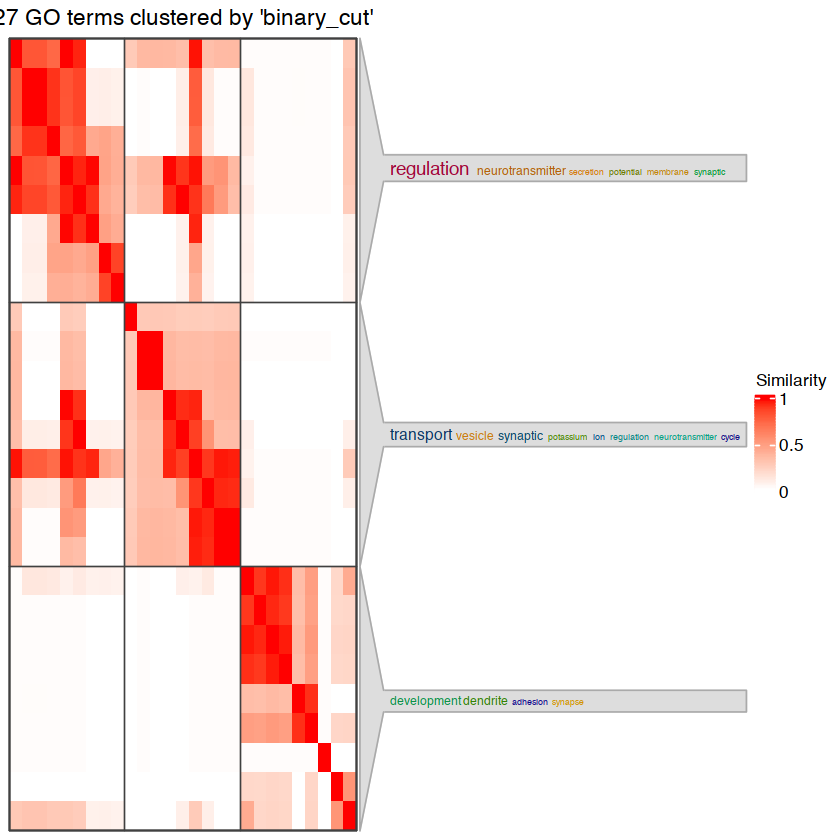

In [144]:
df = simplifyGO(mat)

# Top Genes

# Create a gene table

In [35]:
genetable <- data.frame(matrix(ncol = 7, nrow = 0))
colnames(genetable) <- c('baseMean','log2FoldChange','lfcSE','pvalue','padj','Gene','contrast')

In [36]:
for(c in c("C1", "C2", "C3", "C4")){
    
    print(c)
    flush.console()
    
    load(file = paste0(datapath,"DEG/shrunken_results_", c,"_0.RData"))
    
    mycontrast <- paste0(c, "-Others")
    
    res <- as.data.frame(shrunken_res)
    res$Gene <- rownames(res)
    rownames(res) <- NULL
    res$contrast <- mycontrast
    
    genetable <- rbind(genetable, res)
    
}

[1] "C1"
[1] "C2"
[1] "C3"
[1] "C4"


In [37]:
genetable <- genetable[, c("Gene", "contrast", 'baseMean','log2FoldChange','lfcSE','pvalue','padj')]

In [38]:
save(genetable, file = paste0(datapath, "DEG/genetable_DESeq2.RData"))

# Load gene table

In [39]:
load(file = paste0(datapath, "DEG/genetable_DESeq2.RData"))

In [40]:
head(genetable)

,Gene,contrast,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,C1-Others,2054.9739,-0.09031345,0.08922787,2.902580e-01,3.701310e-01
2,DPM1,C1-Others,835.8481,0.17099374,0.05170467,8.501528e-04,2.201927e-03
3,SCYL3,C1-Others,905.5411,-0.11034094,0.04496591,1.289511e-02,2.496543e-02
4,C1orf112,C1-Others,487.6968,0.10234474,0.06631821,1.165107e-01,1.700023e-01
5,FGR,C1-Others,415.2168,1.95039303,0.12598306,1.114126e-54,4.981414e-52
6,CFH,C1-Others,2695.0234,0.85718022,0.16914374,3.163320e-08,2.066922e-07


In [44]:
dysreg_sig_genes <- genetable[genetable$padj < 0.1 & (genetable$log2FoldChange) >= 2,]  

In [45]:
table(dysreg_sig_genes$contrast, useNA = "always")


C1-Others C4-Others      <NA> 
      110         3         0 

In [46]:
dysreg_sig_genes[which(dysreg_sig_genes$contrast == "C4-Others"),]

,Gene,contrast,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
47498,ZIC2,C4-Others,3714.4168,2.222153,0.3058018,2.355240e-23,5.213508e-22
53858,ZIC5,C4-Others,1193.7158,2.227995,0.3037183,5.684713e-24,1.296877e-22
55707,ZIC3,C4-Others,684.6002,2.656762,0.3245590,2.378122e-38,1.025278e-36


# Volcano plots

In [47]:
genetable <- genetable[!is.na(genetable$pvalue),]

In [48]:
volcano_DEG_plot <- function(genetable, contrast, foldchange, padj){

res <- genetable[ genetable$contrast == contrast,]    
    
res$threshold <- NA
res$threshold[res$log2FoldChange > foldchange & res$padj < padj] <- "Up-regulated"
res$threshold[res$log2FoldChange < -(foldchange) & res$padj < padj] <- "Down-regulated"
res$threshold[is.na(res$threshold)] <- "not significant"    

res_upreg <- res[ res$threshold == "Up-regulated",]    
res_upreg <- res_upreg[order(res_upreg$log2FoldChange, decreasing = T),]    

res_downreg <- res[ res$threshold == "Down-regulated",]    
res_downreg <- res_downreg[order(res_downreg$log2FoldChange, decreasing = F),]  

if(nrow(res_upreg) < 10){
    res$genelabels[res$Gene %in% res_upreg$Gene] <- "UP"
}

if(nrow(res_downreg) < 10){
    res$genelabels[res$Gene %in% res_downreg$Gene] <- "DOWN"    
}    

if(nrow(res_upreg) >= 10){
    res$genelabels[res$Gene %in% res_upreg$Gene[1:10]] <- "UP"   
}

if(nrow(res_downreg) >= 10){
    res$genelabels[res$Gene %in% res_downreg$Gene[1:10]] <- "DOWN"      
}
       
myvolcano_plot <- ggplot(res, aes(x=log2FoldChange, y=-log10(pvalue))) +
    geom_point(aes(color = threshold), size=2.5) +
    scale_colour_manual(values = c("Down-regulated"= "blue", "Up-regulated"="red",  "not significant"= "black")) +
     
    geom_text_repel(label = ifelse(res$genelabels == "UP", as.character(res$Gene),""), 
                    size = 5, box.padding = 1, max.overlaps = Inf, direction = "y", nudge_x = 0.9, 
                    vjust = 0.9, min.segment.length = 0) + 
    geom_text_repel(label = ifelse(res$genelabels == "DOWN", as.character(res$Gene),""), 
                    size = 5, box.padding = 1, max.overlaps = Inf, direction = "y", nudge_x = -1.2, 
                    vjust = 0.5, min.segment.length = 0) +     
    
    myplot + myaxis + 

    theme(axis.text.x = element_text(angle = 0, hjust = 0.5),
          axis.title = element_text(size = 25),
          plot.title = element_text(size = 30, hjust = 0.5),
          legend.position = "none") + 
    labs(x = "Fold change (Log2)" ,y = "p-value (-Log10)") 
    
return(myvolcano_plot)    
}

Warning message:
“Removed 15635 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 15635 rows containing missing values (geom_text_repel).”


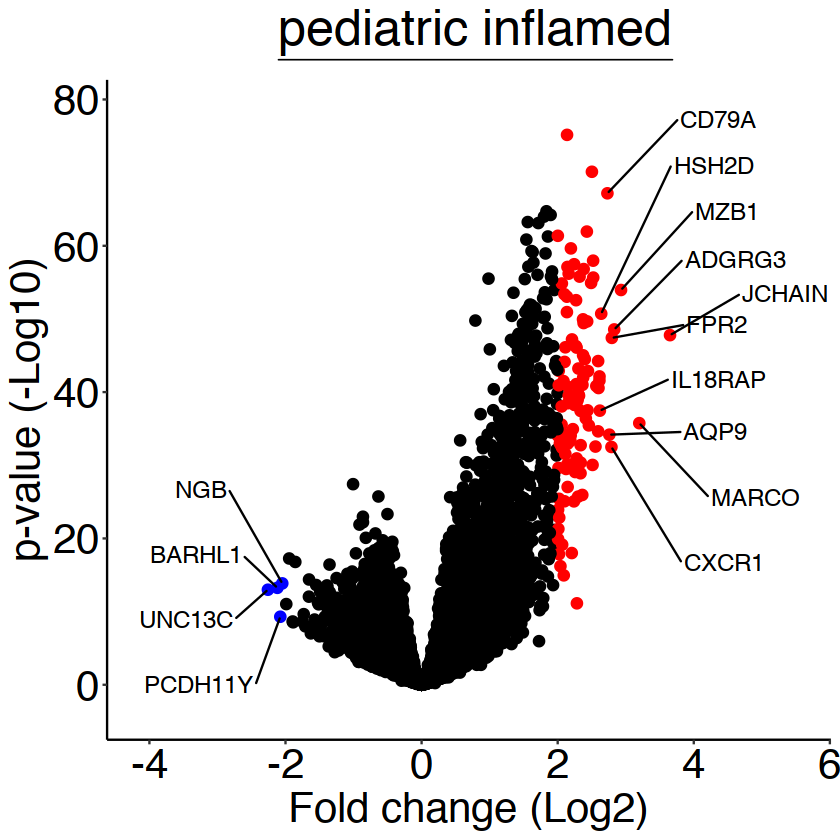

In [50]:
C1_volcano <- volcano_DEG_plot(genetable, "C1-Others", 2, 0.1) + 
scale_x_continuous(expand = c(0.4,0)) + 
scale_y_continuous(expand = c(0.1,0)) +
ggtitle(expression(~underline("pediatric inflamed")))

C1_volcano 

Warning message:
“Removed 15639 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 15639 rows containing missing values (geom_text_repel).”


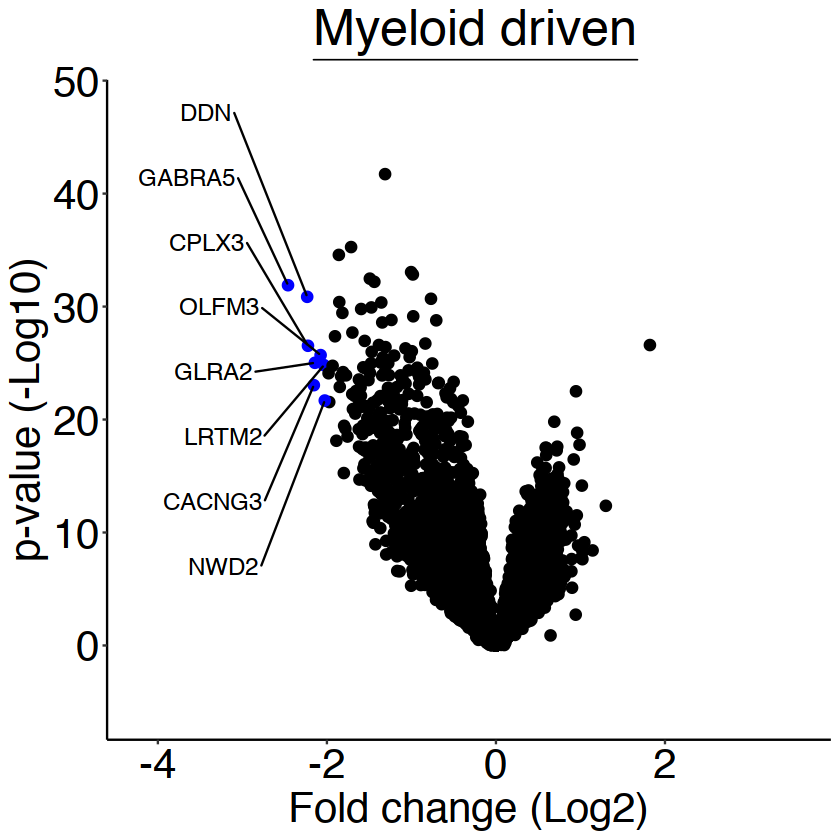

In [51]:
C2_volcano <- volcano_DEG_plot(genetable, "C2-Others", 2, 0.1) + 
scale_x_continuous(expand = c(0.5,0)) +
scale_y_continuous(expand = c(0.2,0)) +
ggtitle(expression(~underline("Myeloid driven")))

C2_volcano

Warning message:
“Removed 15637 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 15637 rows containing missing values (geom_text_repel).”


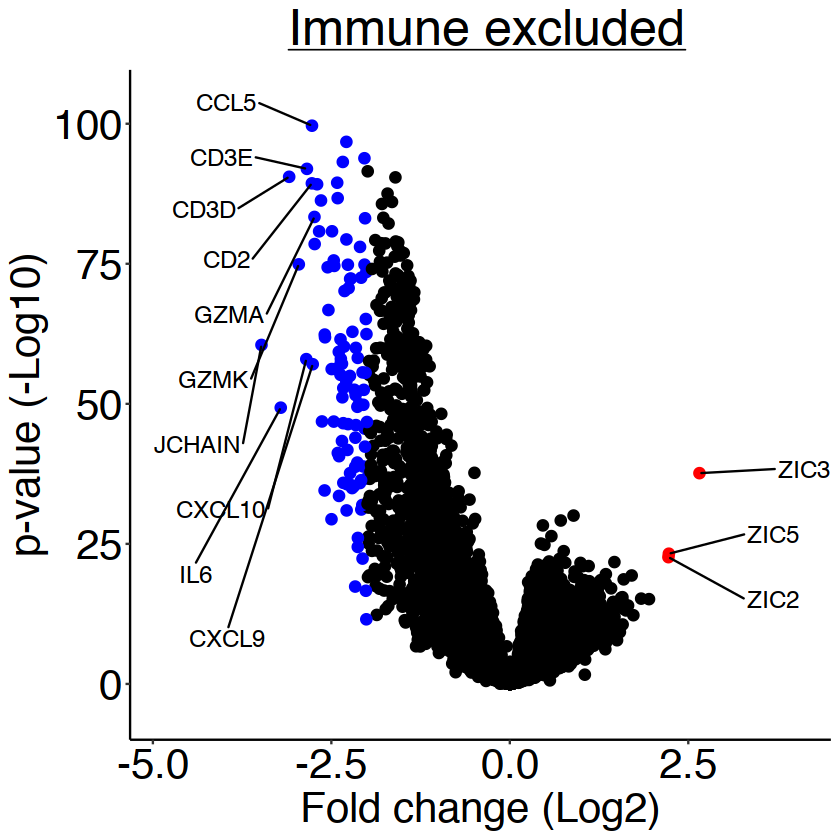

In [52]:
C4_volcano <- volcano_DEG_plot(genetable, "C4-Others", 2, 0.1) + 
scale_x_continuous(expand = c(0.3,0)) +
scale_y_continuous(expand = c(0.1,0)) +
ggtitle(expression(~underline("Immune excluded")))

C4_volcano

Warning message:
“Removed 15651 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 15651 rows containing missing values (geom_text_repel).”


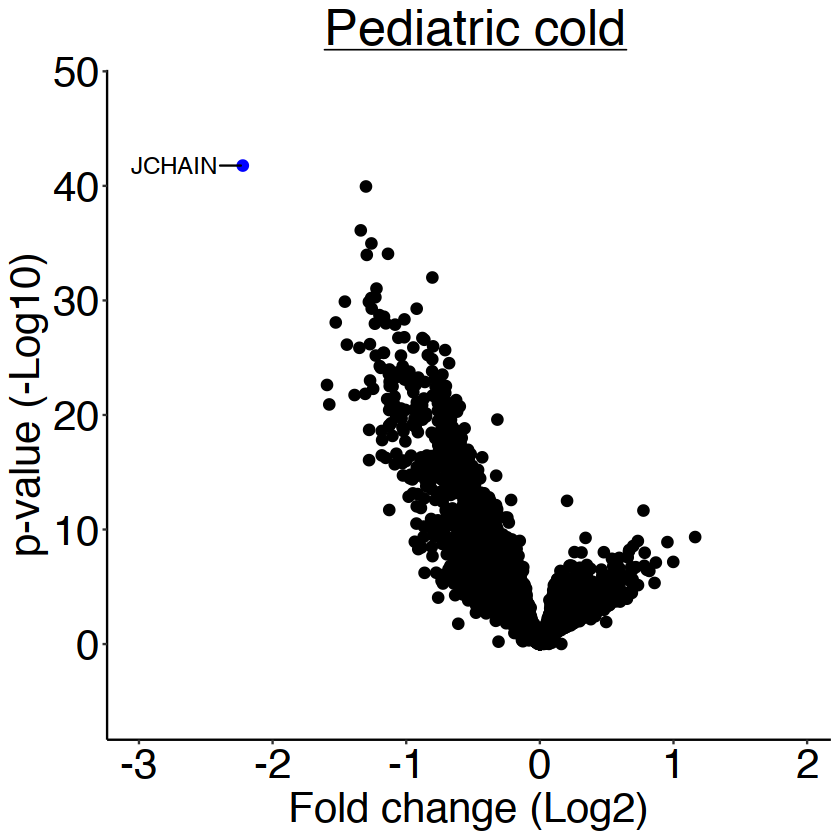

In [53]:
C3_volcano <- volcano_DEG_plot(genetable, "C3-Others", 2, 0.1) + 
scale_x_continuous(expand = c(0.3,0)) +
scale_y_continuous(expand = c(0.2,0)) +
ggtitle(expression(~underline("Pediatric cold")))

C3_volcano

In [38]:
pdf(paste0(plotpath, "DESeq2_C1_volcano.pdf"),
   width = 10, height = 10)

C1_volcano

dev.off()

Warning message:
“Removed 15635 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 15635 rows containing missing values (geom_text_repel).”


pdf 
  2

In [39]:
pdf(paste0(plotpath, "DESeq2_C2_volcano.pdf"),
   width = 10, height = 10)

C2_volcano

dev.off()

Warning message:
“Removed 15639 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 15639 rows containing missing values (geom_text_repel).”


pdf 
  2

In [40]:
pdf(paste0(plotpath, "DESeq2_C3_volcano.pdf"),
   width = 10, height = 10)

C3_volcano

dev.off()

Warning message:
“Removed 15651 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 15651 rows containing missing values (geom_text_repel).”


pdf 
  2

In [41]:
pdf(paste0(plotpath, "DESeq2_C4_volcano.pdf"),
   width = 10, height = 10)

C4_volcano

dev.off()

Warning message:
“Removed 15637 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 15637 rows containing missing values (geom_text_repel).”


pdf 
  2

# Get gene descriptions - TableS9

In [42]:
load(file = paste0(datapath, "DEG/genetable_DESeq2.RData"))

In [43]:
head(genetable)

,Gene,contrast,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,C1-Others,2054.9739,-0.09031345,0.08922787,2.902580e-01,3.701310e-01
2,DPM1,C1-Others,835.8481,0.17099374,0.05170467,8.501528e-04,2.201927e-03
3,SCYL3,C1-Others,905.5411,-0.11034094,0.04496591,1.289511e-02,2.496543e-02
4,C1orf112,C1-Others,487.6968,0.10234474,0.06631821,1.165107e-01,1.700023e-01
5,FGR,C1-Others,415.2168,1.95039303,0.12598306,1.114126e-54,4.981414e-52
6,CFH,C1-Others,2695.0234,0.85718022,0.16914374,3.163320e-08,2.066922e-07


In [44]:
library(biomaRt)

In [45]:
hg38 <- useMart(biomart="ENSEMBL_MART_ENSEMBL", host="www.ensembl.org", 
                path="/biomart/martservice", dataset="hsapiens_gene_ensembl")

Ensembl site unresponsive, trying useast mirror



In [46]:
hgncs <- genetable$Gene

In [47]:
hgnc_type <- getBM(filters="hgnc_symbol",
                   attributes=c("hgnc_symbol","ensembl_gene_id", "description", "gene_biotype"), 
                   values= hgncs,mart = hg38)

ERROR: Error in getNodeSet(html, path = "//div[@class='plain-box float-right archive-box']")[[1]]: subscript out of bounds


In [ ]:
head(genetable)

In [ ]:
genetable$Gene_Description <- hgnc_type$description[ match(genetable$Gene, hgnc_type$hgnc_symbol)]

In [ ]:
xlsx::write.xlsx(dysreg_sig_genes, file = "~/OneDrive - UHN/Documents/Manuscripts/IPD/v9/TableS9.xlsx",
               row.names = F)